## **Project Data Analysis & Machine Learning**
Netflix Content Analysis & Recommendation System This project explores the Netflix dataset to uncover insights about its content and builds a recommendation engine using Natural Language Processing (NLP).

**Imports & Data loading**

In [17]:
#imports necessary librarires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
#Loads the dataset
df = pd.read_csv('netflix_titles.csv')

In [16]:
#Types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8764 non-null   object
 1   type          8764 non-null   object
 2   title         8764 non-null   object
 3   director      6140 non-null   object
 4   cast          7941 non-null   object
 5   country       7943 non-null   object
 6   date_added    8754 non-null   object
 7   release_year  8764 non-null   int64 
 8   rating        8760 non-null   object
 9   duration      8761 non-null   object
 10  listed_in     8764 non-null   object
 11  description   8764 non-null   object
dtypes: int64(1), object(11)
memory usage: 821.8+ KB


In [19]:
#Display the first 5 rows to understand the structure
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

## **Data Cleaning**

In [21]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2624
cast             823
country          821
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [29]:
# Data Cleaning Handling missing values and formatting dates to ensure data quality
df['director'] = df['director'].fillna('unkown')
df['cast'] = df['cast'].fillna('unkown')
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

## **Exploratory Data Analysis and visualizing**

/tmp/ipython-input-2007411138.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type' , data = df , palette = 'Reds')


<function matplotlib.pyplot.show(close=None, block=None)>

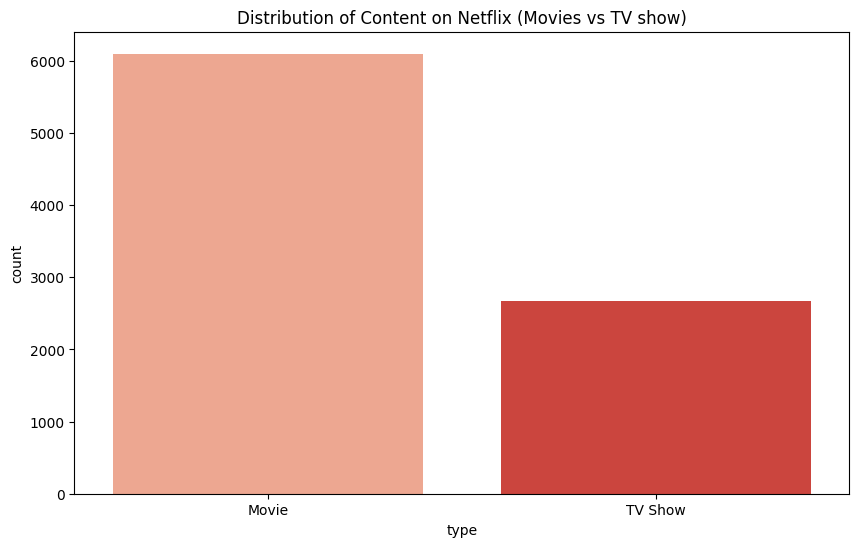

In [30]:
#visualizing the distribution of content on Netflix
plt.figure(figsize=(10 , 6))
sns.countplot(x='type' , data = df , palette = 'Reds')
plt.title('Distribution of Content on Netflix (Movies vs TV show)')
plt.show

/tmp/ipython-input-1013358463.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= top_countries.values , y=top_countries.index , palette = 'Reds')


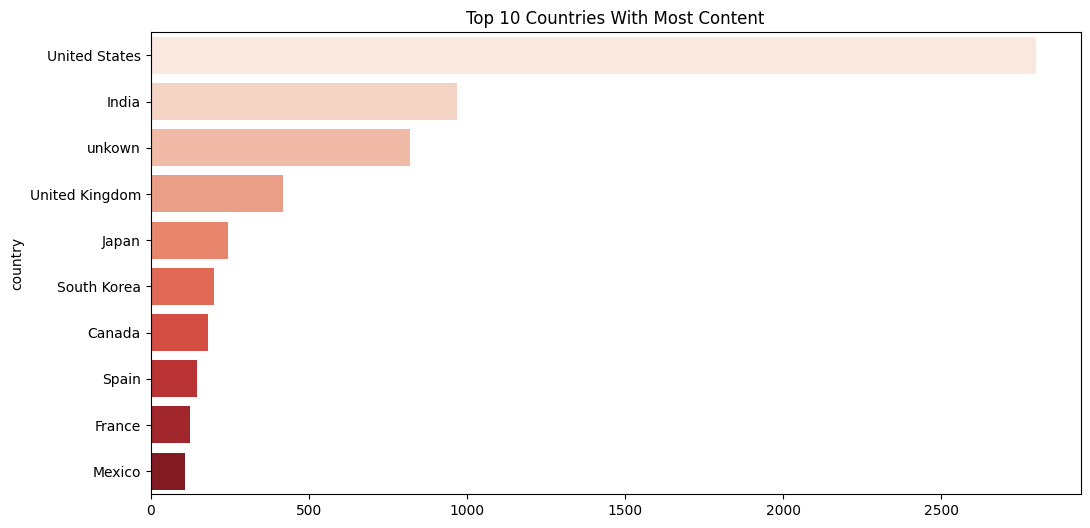

In [34]:
#Visualizing Top 10 Countries with most content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x= top_countries.values , y=top_countries.index , palette = 'Reds')
plt.title('Top 10 Countries With Most Content')
plt.show()

## **Machine Learning Model**

In [64]:
#building the recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [63]:
#Combine description and genres for richer text data
df['content_info'] = df['description'] + "" + df['listed_in']

In [62]:
#Initialize TF-IDF Vectorizer to remove  English words
tfidf = TfidfVectorizer(stop_words='english')
# Transform the text data into a TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(df['content_info'])

In [61]:
#Function to fetch recommendations for a given title
def get_recommendations(title, cosine_sim):
  indices = pd.Series(df.index , index=df['title']).drop_duplicates()
  idx = indices[title]

  #Get similarity scores for the selected movie
  sim_scores = list(enumerate(cosine_sim[idx]))
  #Sort movies based on similarity scores in descending order
  sim_scores = sorted(sim_scores , key=lambda x: x[1], reverse=True)
  #Select the top 5 most similar titles
  sim_scores = sim_scores[1:6]
  movie_indices = [i[0]for i in sim_scores]
  return df['title'].iloc[movie_indices]


In [60]:
print("if you don't like Zombieland you may watch these movies")
print(get_recommendations('Zombieland', cosine_sim))

if you don't like Zombieland you may watch these movies
8593          True to the Game
1798    The Last Kids on Earth
2048          The Bridge Curse
1588                Rust Creek
8068                Submission
Name: title, dtype: object
